#**Analyzing Traffic Accidents in Bogotá from 2015 to 2021 - Team 82**
José Armando Delgado Álvarez, Andrés Felipe Guzmán Romero, Luis Camilo Jiménez Álvarez, Juan Pablo Lancheros Rodríguez, Paola Andrea Matheus Arbeláez, Alejandro Moreno Fresneda, Leidy Milena Nieves Mendoza, Andrés Felipe Pérez Osorio

# **Exploratory Data Analysis -EDA**

##Import libraries and load the dataset

We begin by importing the necessary libraries required to perform our exploratory data analysis.

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import plotly.graph_objects as go
import plotly.express as px


The data are imported as follows:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Data DS4A/historico_siniestros_bogota.csv'

Mounted at /content/drive


## Inspecting data structure
We begin by loading the data and looking at its basic shape:

In [ ]:
df = pd.read_csv(path, index_col=False)
df.shape

(199146, 16)

We display the top and bottom rows, in order to have a preliminary view of the data

In [ ]:
df.head()

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN
3,-74.166937,4.587187,7,A000200705,4412699,2015/05/11 00:00:00+00,2015,CL 63A-KR 72 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,19001483.0,136166.0
4,-74.092901,4.607648,8,A000402862,4447845,2016/06/08 00:00:00+00,2016,KR 27-CL 9 14,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,14000548.0,239719.0


In [ ]:
df.tail()

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
199141,-74.160000,4.63700,421907,A001341297,10548522,2021/08/30 00:00:00+00,2021,KR 86 F - CL 33 S 02,SOLO DANOS,CHOQUE,KENNEDY,2021/08/30 16:31:00+00,4.63700,-74.160000,8003090.0,NaN
199142,-74.167000,4.62800,421908,A001305748,10546116,2021/08/03 00:00:00+00,2021,CL 42 B S- KR 81 L 02,CON HERIDOS,ATROPELLO,KENNEDY,2021/08/03 14:00:00+00,4.62800,-74.167000,8005066.0,NaN
199143,-74.158247,4.62483,421909,A001238302,10536074,2021/03/19 00:00:00+00,2021,DG 2 S- KR 79 12,CON HERIDOS,CHOQUE,KENNEDY,2021/03/19 12:50:00+00,4.62483,-74.158247,8005839.0,NaN
199144,-74.167000,4.62200,421910,A001297106,10538181,2021/04/18 00:00:00+00,2021,CL 43 S- KR 80 02,CON HERIDOS,CHOQUE,KENNEDY,2021/04/18 21:21:00+00,4.62200,-74.167000,8011660.0,NaN
199145,-74.168000,4.63000,421911,A001304271,10544226,2021/07/12 00:00:00+00,2021,AV AVENIDA CIUDAD DE CALI - CL 42 S 02,CON HERIDOS,CAIDA DE OCUPANTE,KENNEDY,2021/07/12 19:53:00+00,4.63000,-74.168000,8004623.0,NaN


#Check column names and types

We translate the column names to have consistency in next steps:

In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'FORMULARIO', 'CODIGO_ACCIDENTE',
       'FECHA_OCURRENCIA_ACC', 'ANO_OCURRENCIA_ACC', 'DIRECCION', 'GRAVEDAD',
       'CLASE_ACC', 'LOCALIDAD', 'FECHA_HORA_ACC', 'LATITUD', 'LONGITUD',
       'CIV', 'PK_CALZADA'],
      dtype='object')

In [ ]:
columns_dict = {"OBJECTID":"id", 
                "FORMULARIO":"form_id",
                "CODIGO_ACCIDENTE": "accident_code",
                "FECHA_OCURRENCIA_ACC": "date_ocurrence",
                "ANO_OCURRENCIA_ACC": "year_ocurrence",
                "DIRECCION":"address",
                "GRAVEDAD":"severity",
                "CLASE_ACC":"accident_type",
                "LOCALIDAD":"borough",
                "FECHA_HORA_ACC":"full_date",
                "LATITUD":"latitude",
                "LONGITUD":"longitude",
                "CIV":"civ",
                "PK_CALZADA":"road_id",
               }
df = df.rename(columns = columns_dict)

We inspect the column data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199146 entries, 0 to 199145
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               199146 non-null  float64
 1   Y               199146 non-null  float64
 2   id              199146 non-null  int64  
 3   form_id         199146 non-null  object 
 4   accident_code   199146 non-null  int64  
 5   date_ocurrence  199146 non-null  object 
 6   year_ocurrence  199146 non-null  int64  
 7   address         199146 non-null  object 
 8   severity        199146 non-null  object 
 9   accident_type   199146 non-null  object 
 10  borough         199100 non-null  object 
 11  full_date       199146 non-null  object 
 12  latitude        199146 non-null  float64
 13  longitude       199146 non-null  float64
 14  civ             197445 non-null  float64
 15  road_id         161172 non-null  float64
dtypes: float64(6), int64(3), object(7)
memory usage: 24.3+ M

##Basic summary statistics

We want to have an overhead view of the numeric variables in our data

In [ ]:
df.describe()

,X,Y,id,accident_code,year_ocurrence,latitude,longitude,civ,road_id
count,199146.000000,199146.000000,199146.000000,1.991460e+05,199146.000000,199146.000000,199146.000000,1.974450e+05,1.611720e+05
mean,-74.104096,4.649135,246116.268160,7.368238e+06,2017.760106,4.649135,-74.104096,1.379895e+07,7.588678e+06
std,0.040099,0.057567,128297.631741,3.017820e+06,1.855071,0.057567,0.040099,1.346756e+07,1.840877e+07
min,-74.228300,4.085800,1.000000,4.401420e+06,2015.000000,4.085800,-74.228300,0.000000e+00,0.000000e+00
25%,-74.134196,4.608163,135603.750000,4.458053e+06,2016.000000,4.608163,-74.134196,7.004943e+06,4.326700e+04
50%,-74.103043,4.645415,283027.500000,4.512848e+06,2018.000000,4.645415,-74.103043,1.000758e+07,1.769000e+05
75%,-74.073008,4.690015,358176.750000,1.049794e+07,2019.000000,4.690015,-74.073007,1.500116e+07,2.354850e+05
max,-74.011000,4.828041,421911.000000,1.054926e+07,2021.000000,4.828041,-74.011000,5.000962e+07,9.103049e+07


From the the summary statistics calculated before we can get some insights. First, we note that columns X and Y seems to have the same values as "longitude" and "latitude" columns. Second, it's possible to know that we have data from 2015 to 2021 according "year_ocurrence". However, afterwards we are going to check if we have complete data for those years. Third, maybe zero values from "civ" and "road_id" could be related with missing data for those fields. 

##Check for data redundancy


As we said before, columns X and Y contain the same information as the columns "longitude" and "latitude" respectively. Therefore, we are going to remove them from the dataset.

In [ ]:
df = df.drop(['X','Y'], axis=1)

We check if civ and road_id have unique identifiers values or if many accidents could be the same civ:



In [ ]:
len(df), len(df['civ'].unique())

(199146, 38420)

In [ ]:
len(df), len(df['road_id'].unique())

(199146, 37954)

We note that civ and road_id have values that could be represent many accidents.

We extract the date in the column ```date_ocurrence``` by removing the hour part in order to have date with and without hour. Then, we transform it into datetime format.

##Checking for missing values

In [ ]:
counting_NAs = df.isna().sum()
counting_NAs

id                    0
form_id               0
accident_code         0
date_ocurrence        0
year_ocurrence        0
address               0
severity              0
accident_type         0
borough              46
full_date             0
latitude              0
longitude             0
civ                1701
road_id           37974
dtype: int64

"civ" and "road_id" columns have a big number of NAs and it's difficult try to fill those values from the background. Maybe, for "borough" we have the change to get the correct value from "latitude" and "longitude" columns.

#Cheking for misspelled text

In order to check for mispelled text, the categorical data of columns ```accident_type```, ```borough``` and ```severity ``` were surveyed to filter out unique values.

In [ ]:
df['accident_type'].unique()

array(['CHOQUE', 'OTRO', 'ATROPELLO', 'VOLCAMIENTO', 'CAIDA DE OCUPANTE',
       'AUTOLESION', 'INCENDIO'], dtype=object)

In [ ]:
rename_dict_acctype = {"ATROPELLO":"Run-over", "AUTOLESION":"Self-harm",
                        "CAIDA DE OCUPANTE":"Passenger falling", "CHOQUE":"Crash", 
                        "INCENDIO":"Fire","OTRO":"Other", "VOLCAMIENTO":"Overturn"}
df = df.replace({"accident_type": rename_dict_acctype})


In [ ]:
df['borough'].unique()

array(['ENGATIVA', 'PUENTE ARANDA', 'USAQUEN', 'CIUDAD BOLIVAR',
       'LOS MARTIRES', 'SUBA', 'FONTIBON', 'USME', 'TEUSAQUILLO',
       'BARRIOS UNIDOS', 'RAFAEL URIBE URIBE', 'CHAPINERO', 'KENNEDY',
       'ANTONIO NARINO', 'BOSA', 'SAN CRISTOBAL', 'CANDELARIA',
       'TUNJUELITO', 'SANTA FE', nan, 'SUMAPAZ'], dtype=object)

In [ ]:
rename_dict_boroughs = {"ANTONIO NARINO": "ANTONIO NARIÑO"}
df = df.replace({"borough": rename_dict_boroughs})

In [ ]:
df['severity'].unique()

array(['SOLO DANOS', 'CON HERIDOS', 'CON MUERTOS'], dtype=object)

In [ ]:
dict_sev = {"SOLO DANOS": "Only damages", "CON HERIDOS":"With Injured", "CON MUERTOS":"With deceased"}
df = df.replace({"severity": dict_sev})

As we note in the last lines of codes, we don´t have mispelling problems, but we translate them before continue the process. 

#Exploring categorical variables

We start looking the distribution of accidents according to "Severity":

In [ ]:
df['Count'] = 1

In [ ]:
from pandas.core.frame import DataFrame
df_sev = df.groupby(['severity'])["Count"].sum()
df_sev= DataFrame(df_sev).reset_index()
df_sev["percentage"] = ((df_sev["Count"] / df_sev["Count"].sum())*100).astype(int).astype(str) + '%'
df_sev

,severity,Count,percentage
0,Only damages,128207,64%
1,With Injured,67700,33%
2,With deceased,3239,1%


In [ ]:
px.bar(df_sev, x=df_sev.severity, y=df_sev.Count, color="severity", title="Accidents by Severity", text= "percentage")

For the whole period of analysis we can see that most accidents (64%) only represent material damages.

Now, We are going to explore the number of accidents by type:

In [ ]:
df_type = df.groupby(['accident_type'])["Count"].sum()
df_type= DataFrame(df_type).reset_index()
df_type = df_type.sort_values("Count", ascending = False)
df_type["percentage"] = ((df_type["Count"] / df_type["Count"].sum())*100).astype(int).astype(str) + '%'
df_type

,accident_type,Count,percentage
0,Crash,170802,85%
5,Run-over,20138,10%
4,Passenger falling,4639,2%
3,Overturn,2729,1%
2,Other,804,0%
1,Fire,24,0%
6,Self-harm,10,0%


In [ ]:
px.bar(df_type, x=df_type.accident_type, y=df_type.Count, color="accident_type", title="Accidents by type", text= "percentage")

For the whole period of analysis we found that 85% of accidents are product of a crash. 

We look at number of accidents by borough:


In [ ]:
df_brg = df.groupby(['borough'])["Count"].sum()
df_brg= DataFrame(df_brg).reset_index()
df_brg = df_brg.sort_values("Count", ascending = False)
df_brg["percentage"] = ((df_brg["Count"] / df_brg["Count"].sum())*100).astype(int).astype(str) + '%'
df_brg

,borough,Count,percentage
8,KENNEDY,23661,11%
6,ENGATIVA,20928,10%
18,USAQUEN,19292,9%
14,SUBA,18973,9%
7,FONTIBON,16377,8%
10,PUENTE ARANDA,14143,7%
4,CHAPINERO,11696,5%
16,TEUSAQUILLO,10167,5%
1,BARRIOS UNIDOS,10094,5%
2,BOSA,9417,4%


In [ ]:
px.bar(df_brg, x=df_brg.borough, y=df_brg.Count, color="borough", title="Accidents by borough", text= "percentage")

Without exploring other factors, we can say that "Kennedy", "Engativa" and "Usaquen" are the top three boroughs with more accidents. Those boroughs have around 20k accidents for the whole period of analysis. On the other side, the boroughs with less accidentality are "Sumapaz", "Candelaria" and "Antonio Nariño" with a level of accidents less than 5k.

#Working with dates

First, we split the dates to explore trends on the data according to different periodicity:

We convert "full_date" column to datatime format:

In [ ]:
df['full_date'] = pd.to_datetime(df['full_date'])
df['full_date'].head

<bound method NDFrame.head of 0        2017-06-12 05:30:00+00:00
1        2020-11-19 02:05:00+00:00
2        2020-11-10 13:30:00+00:00
3        2015-05-11 10:50:00+00:00
4        2016-06-08 21:30:00+00:00
                    ...           
199141   2021-08-30 16:31:00+00:00
199142   2021-08-03 14:00:00+00:00
199143   2021-03-19 12:50:00+00:00
199144   2021-04-18 21:21:00+00:00
199145   2021-07-12 19:53:00+00:00
Name: full_date, Length: 199146, dtype: datetime64[ns, UTC]>

We remove the hour string from column date_ocurrence removing zeros from hour part:

In [ ]:
df['date'] = pd.to_datetime(df['date_ocurrence'].str[:-12])
df['date'].head()

0   2017-06-12
1   2020-11-19
2   2020-11-10
3   2015-05-11
4   2016-06-08
Name: date, dtype: datetime64[ns]

Distribution of accidents by year

In [ ]:
df_years = df.groupby(['year_ocurrence'])["Count"].sum()
df_years= DataFrame(df_years).reset_index()
df_years = df_years.sort_values("Count", ascending = False)
df_years["percentage"] = ((df_years["Count"] / df_years["Count"].sum())*100).astype(int).astype(str) + '%'
df_years

,year_ocurrence,Count,percentage
3,2018,33418,16%
4,2019,32962,16%
2,2017,32415,16%
1,2016,31928,16%
0,2015,27885,14%
5,2020,22424,11%
6,2021,18114,9%


In [ ]:
fig = px.bar(df_years, x=df_years.year_ocurrence, y=df_years.Count, title="Accidents by year",  color="year_ocurrence", text= "percentage")
fig.update_coloraxes(showscale = False)
fig.show()

According to the chart, we can say that maybe 2020 has less accidents than previous years due to pandemic. But the low level of accidents of 2021 could be related with missing data for the end of the year. We need to check that inspecting the months with available data for each year.

We create a new column to display month and year. In this way, we can display a time series chart:

In [ ]:
df['MM_YYYY'] = df['date'].dt.to_period('M')
df['MM_YYYY'] = df['MM_YYYY'].dt.strftime('%b/%Y')
df['MM_YYYY']

0         Jun/2017
1         Nov/2020
2         Nov/2020
3         May/2015
4         Jun/2016
            ...   
199141    Aug/2021
199142    Aug/2021
199143    Mar/2021
199144    Apr/2021
199145    Jul/2021
Name: MM_YYYY, Length: 199146, dtype: object

We group data by month and year and sort them for the time series chart: 

In [ ]:
df_my = df.groupby(['MM_YYYY'])["Count"].sum()
df_my= DataFrame(df_my).reset_index()
df_my["MM_YYYY"] = df_my["MM_YYYY"].astype(str)
df_my["MM"] = df_my["MM_YYYY"].str[0:3]
df_my["YYYY"] = df_my["MM_YYYY"].str[4:8]
num_months = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
df_my = df_my.replace({"MM": num_months})
df_my = df_my.sort_values(["YYYY","MM" ])
df_my

,MM_YYYY,Count,MM,YYYY
27,Jan/2015,1913,1,2015
20,Feb/2015,2310,2,2015
48,Mar/2015,2396,3,2015
0,Apr/2015,2259,4,2015
55,May/2015,2388,5,2015
...,...,...,...,...
61,May/2021,2030,5,2021
47,Jun/2021,2341,6,2021
40,Jul/2021,2423,7,2021
13,Aug/2021,2506,8,2021


In [ ]:
fig = px.line(df_my, x='MM_YYYY', y='Count',
    labels=dict( Count = "Total Accidents"), title = "Total accidents by year and month")

fig.update_xaxes(tickangle=270)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 3,
        showgrid=False,
    ), #yaxis=dict(showgrid=False),
)
fig.show()

Looking at the whole period of analysis, 2015 was the year with the lowest level of accidentality, while from 2016 to 2019 the average level of accidents was similar. Also, we see that 2020 was an atypical year, with a strong drop on April 2020 caused by the COVID-19 pandemic lockdown in Bogotá. From this , the level of accidents was lower than 2020, until september when the goverment finished the quarantine period. After this action, the level of accidents have been more similar to 2016, but having bigger spikes than before.
On the other side, looking at seasonality we see that January represents the month with less accidents than the other months. This situation can be explained by New Year celebration and holidays. People usually go away from the city to have fun on tourist destinations. Then, the drop on december can be also explained for the same reason: Xmas activities and holidays, but the effect is smaller that in january.
We also note that 2021 has incomplete data, because we are missing data from september to december.

We create a new column with hour to look at this factor later:

In [ ]:
df['hour'] = pd.to_datetime(df['full_date']).dt.hour
df['hour']

0          5
1          2
2         13
3         10
4         21
          ..
199141    16
199142    14
199143    12
199144    21
199145    19
Name: hour, Length: 199146, dtype: int64

We group the accidents by hour:

In [ ]:
df_hour = df.groupby(['hour'])["Count"].sum()
df_hour= DataFrame(df_hour).reset_index()
df_hour = df_hour.sort_values("hour", ascending = True)

In [ ]:
fig= px.bar(df_hour, x=df_hour.hour, y=df_hour.Count, color="hour", title="Accidents by hour")
fig.update_coloraxes(showscale = False)
fig.show()

From the aggregated chart, we can conclude that the accidents have a low level of ocurrence in the early morning until 5 a.m. From this hour, the accidents start to increase the level. This situation can be explained by people who have to work really early and also for people following the rule of "pico y placa" starting a 6.am. For 6a.m there is a big increse in accidentality explained by people who have to come to work at 7 or maybe  for parents leaving their childrens at school. For 7a.m and 8 a.m there is a similar level of accidents in total, with higher levels than previous hours. For 9 a.m there is a small drop, and from there, accidents increase slighlty until 14p.m. This hour respresents the maximum level of accidents and from there, we can observe a kind of decreasing trend, more remarkable from 21:00 hours.

Now, we are going to check the trend of accidentality by weekday:

In [ ]:
df['Weekday'] = pd.to_datetime(df['date_ocurrence']).dt.day_name()
df['Weekday']

0            Monday
1          Thursday
2           Tuesday
3            Monday
4         Wednesday
            ...    
199141       Monday
199142      Tuesday
199143       Friday
199144       Sunday
199145       Monday
Name: Weekday, Length: 199146, dtype: object

In [ ]:
df_wkday = df.groupby(['Weekday'])["Count"].sum()
df_wkday= DataFrame(df_wkday).reset_index()
num_wkday = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5,"Saturday":6,"Sunday":7}
df_wkday['Num_Weekday'] = df_wkday['Weekday']
df_wkday = df_wkday.replace({"Num_Weekday": num_wkday})
df_wkday = df_wkday.sort_values(["Num_Weekday"])
df_wkday

,Weekday,Count,Num_Weekday
1,Monday,27303,1
5,Tuesday,30806,2
6,Wednesday,29754,3
4,Thursday,29657,4
0,Friday,32074,5
2,Saturday,30023,6
3,Sunday,19529,7


In [ ]:
fig= px.bar(df_wkday, x=df_wkday.Weekday, y=df_wkday.Count, color="Weekday", title="Accidents by weekday")
fig.update_coloraxes(showscale = False)
fig.show()

Most weekdays have a total number of accidents around 30k. In this case, Sunday has the lowest number of accidents with 19k aproximately. This situation could be related with people staying at home to rest. The second day with less accidents is Monday, with 27k accidents in total and a level more similar to other weekdays. Maybe, this situation could be related with people having enough rest during weekend and then an improvement on driving performance in Mondays. The increase in Friday, could be related with people driving under the influence of alcohol. 

## Investigating pairwise relationships
Pearson correlation coefficients between borough, year, month, weekday and number of daily accidents.

,date_ocurrence,borough,year_ocurrence,Number of daily accidents,month,weekday
0,2017/03/17 00:00:00+00,USAQUEN,2017,26,3,4
1,2021/08/27 00:00:00+00,KENNEDY,2021,25,8,4
2,2019/09/28 00:00:00+00,KENNEDY,2019,25,9,5
3,2017/10/27 00:00:00+00,USAQUEN,2017,25,10,4
4,2018/05/15 00:00:00+00,ENGATIVA,2018,24,5,1
...,...,...,...,...,...,...
41231,2019/01/01 00:00:00+00,BOSA,2019,1,1,1
41232,2019/01/01 00:00:00+00,CHAPINERO,2019,1,1,1
41233,2019/01/01 00:00:00+00,FONTIBON,2019,1,1,1
41234,2019/01/02 00:00:00+00,ENGATIVA,2019,1,1,2


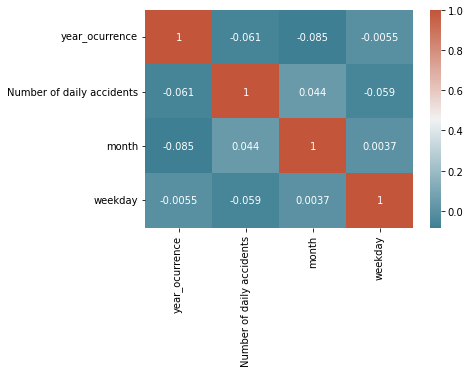

In [ ]:
df3 = df.copy()
df3 = df.groupby(['date_ocurrence','borough','year_ocurrence']).size().sort_values(ascending=False).to_frame('Number of daily accidents').reset_index()
df3['month'] = pd.DatetimeIndex(df3['date_ocurrence']).month
df3['weekday'] = pd.DatetimeIndex(df3['date_ocurrence']).dayofweek
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
df3

## Contingency tables and heatmaps
Heatmap of the contingency table of the type of accident and their severity.

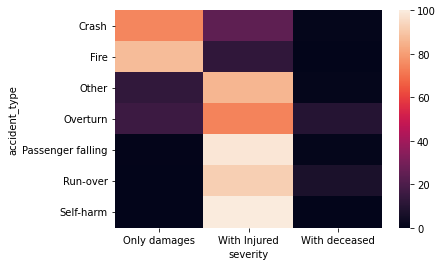

In [ ]:
contingency_table1 = pd.crosstab(index = df['accident_type'], columns = df['severity'], normalize="index")*100
contingency_table1
sns.heatmap(contingency_table1);

Heatmap of the contingency table of the year and the borough.

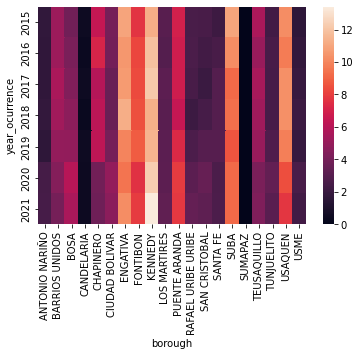

In [ ]:
contingency_table2 = pd.crosstab(index = df['year_ocurrence'], columns = df['borough'], normalize="index")*100
contingency_table2
sns.heatmap(contingency_table2);

Heatmap of the contingency table of the month and the weekday.

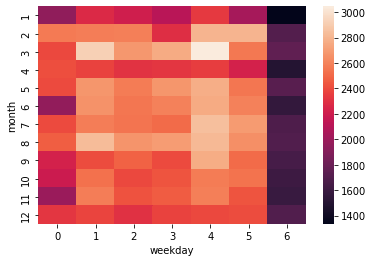

In [ ]:
df6 = df
df6['month'] = pd.DatetimeIndex(df6['date_ocurrence']).month
df6['weekday'] = pd.DatetimeIndex(df6['date_ocurrence']).dayofweek
contingency_table3 = pd.crosstab(index = df['month'], columns = df['weekday'])
contingency_table3
sns.heatmap(contingency_table3);